# 0. GPU ÏÇ¨Ïö©ÌôòÍ≤Ω Íµ¨Ï∂ï ÌôïÏù∏

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


from tensorflow.python.client import device_lib
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(device_lib.list_local_devices())
print('GPU Avaliable: ', tf.test.is_gpu_available())

Num GPUs Available:  0
[]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15775139995809350900
]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Avaliable:  False


In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ & resize

In [3]:
from PIL import Image
import glob
import os
print('PIL ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å')

PIL ÎùºÏù¥Î∏åÎü¨Î¶¨ import ÏôÑÎ£å


In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # ÌååÏùºÎßàÎã§ Î™®Îëê 28x28 ÏÇ¨Ïù¥Ï¶àÎ°ú Î∞îÍæ∏Ïñ¥ Ï†ÄÏû•Ìï©ÎãàÎã§.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [5]:
# Í∞ÄÏúÑ Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ÄÏû•Îêú ÎîîÎ†âÌÜ†Î¶¨ ÏïÑÎûòÏùò Î™®Îì† jpg ÌååÏùºÏùÑ ÏùΩÏñ¥Îì§Ïó¨ÏÑú
image_dir_path_scissor = os.getenv("HOME") + "/aiffel/0305_rcp/scissor/scissor"
resize_images(image_dir_path_scissor)

print("Í∞ÄÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!")

2204  images to be resized.
2204  images resized.
Í∞ÄÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!


In [6]:
image_dir_path_rock = os.getenv("HOME") + '/aiffel/0305_rcp/rock/rock'
resize_images(image_dir_path_rock)
print('Î∞îÏúÑ Resized')

1967  images to be resized.
1967  images resized.
Î∞îÏúÑ Resized


In [7]:
image_dir_path_paper = os.getenv("HOME") + '/aiffel/0305_rcp/paper/paper'
resize_images(image_dir_path_paper)
print('Î≥¥ Resized')

1876  images to be resized.
1876  images resized.
Î≥¥ Resized


In [8]:
import numpy as np

def load_data(img_path, number_of_data=6047):  # Í∞ÄÏúÑÎ∞îÏúÑÎ≥¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Ï¥ùÌï©Ïóê Ï£ºÏùòÌïòÏÑ∏Ïöî.
    # Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2
    img_size=28
    color=3
    #Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎùºÎ≤®(Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2) Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ ÌñâÎ†¨(matrix) ÏòÅÏó≠ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=0   # Í∞ÄÏúÑ : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=1   # Î∞îÏúÑ : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=2   # Î≥¥ : 2
        idx=idx+1
        
    print("ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x_train)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî", idx,"ÏûÖÎãàÎã§.")
    return imgs, labels

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x_train)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 6047 ÏûÖÎãàÎã§.
x_train shape: (6047, 28, 28, 3)
y_train shape: (6047,)


ÎùºÎ≤®:  0


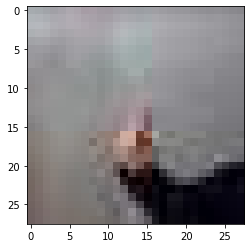

In [10]:
import matplotlib.pyplot as plt

a=2000
plt.imshow(x_train[a])
print('ÎùºÎ≤®: ', y_train[a])

# 3. Îî•Îü¨Îãù ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÑ§Í≥Ñ

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# modelÏùÑ ÏßÅÏ†ë ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî.
# Hint! modelÏùò ÏûÖÎ†•/Ï∂úÎ†•Î∂ÄÏóê ÌäπÌûà Ïú†ÏùòÌï¥ Ï£ºÏÑ∏Ïöî. Í∞ÄÏúÑÎ∞îÏúÑÎ≥¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Ïñ¥Îñ§ Ï†êÏù¥ Îã¨ÎùºÏ°åÎÇòÏöî?

# ÏïÑÎûòÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî ÏòàÏãúÏûÖÎãàÎã§. ÎÜíÏùÄ Ïù∏ÏãùÎ•†ÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÏàòÏ†ïÌï¥ Î≥¥ÏÑ∏Ïöî. 
n_channel_1=32
n_channel_2=64
n_dense_1=64
n_dense_2=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_1, activation='relu'))
model.add(keras.layers.Dense(n_dense_2, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

# 4. Îî•Îü¨Îãù ÎÑ§Ìä∏ÏõåÌÅ¨ ÌïôÏäµ

In [12]:
model.compile(optimizer ='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

history = model.fit(x_train, y_train, epochs=12, validation_split = 0.2)

Epoch 1/12
152/152 [==============================] - 7s 41ms/step - loss: 2.2738 - accuracy: 0.6624 - val_loss: 0.6465 - val_accuracy: 0.7488
Epoch 2/12
152/152 [==============================] - 6s 39ms/step - loss: 0.2622 - accuracy: 0.9094 - val_loss: 0.5452 - val_accuracy: 0.8017
Epoch 3/12
152/152 [==============================] - 6s 39ms/step - loss: 0.1311 - accuracy: 0.9566 - val_loss: 0.3889 - val_accuracy: 0.8380
Epoch 4/12
152/152 [==============================] - 6s 40ms/step - loss: 0.0857 - accuracy: 0.9702 - val_loss: 0.3299 - val_accuracy: 0.8860
Epoch 5/12
152/152 [==============================] - 6s 39ms/step - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.1625 - val_accuracy: 0.9488
Epoch 6/12
152/152 [==============================] - 6s 40ms/step - loss: 0.0517 - accuracy: 0.9830 - val_loss: 0.2794 - val_accuracy: 0.9025
Epoch 7/12
152/152 [==============================] - 6s 40ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.2661 - val_accuracy: 0.9116

>  Sparse_categorical_crossentropy : yÎ•º 1-10ÍπåÏßÄÏùò Î≤îÏ£ºÌòïÏúºÎ°ú ÎÇòÎààÎã§ & sparseÏùò ÏùòÎØ∏Îäî 1-10 Ï§ë Ïò§ÏßÅ ÌïòÎÇòÎßå Í≥†Î•º Ïàò ÏûàÎã§Îäî Í≤É.

# 5. ÌÖåÏä§Ìä∏

In [13]:
import numpy as np

def load_data(img_path, number_of_data=300):  # Í∞ÄÏúÑÎ∞îÏúÑÎ≥¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Ï¥ùÌï©Ïóê Ï£ºÏùòÌïòÏÑ∏Ïöî.
    # Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2
    img_size=28
    color=3
    #Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎùºÎ≤®(Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2) Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ ÌñâÎ†¨(matrix) ÏòÅÏó≠ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=0   # Í∞ÄÏúÑ : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=1   # Î∞îÏúÑ : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=2   # Î≥¥ : 2
        idx=idx+1
        
    print("ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞(x_test)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî", idx,"ÏûÖÎãàÎã§.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî

ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞(x_test)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 300 ÏûÖÎãàÎã§.


In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞(x_test)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 300 ÏûÖÎãàÎã§.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.1225 - accuracy: 0.9833
test_loss: 0.12249259650707245 
test_accuracy: 0.9833333492279053


In [16]:
predicted_result = model.predict(x_test)  # modelÏù¥ Ï∂îÎ°†Ìïú ÌôïÎ•†Í∞í. 
predicted_labels = np.argmax(predicted_result, axis=1) #ÌôïÎ•†Í∞íÏù¥ ÏµúÎåÄÏù∏ Í≤É

idx=0  #1Î≤àÏß∏ x_testÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê. 
print('model.predict() Í≤∞Í≥º : ', predicted_result[idx])
print('modelÏù¥ Ï∂îÎ°†Ìïú Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤∞Í≥º : ', predicted_labels[idx])
print('Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® : ', y_test[idx])

model.predict() Í≤∞Í≥º :  [9.9120075e-01 2.5481391e-13 8.7992651e-03]
modelÏù¥ Ï∂îÎ°†Ìïú Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ Í≤∞Í≥º :  0
Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤® :  0


ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.993375e-01 5.704013e-04 9.213336e-05]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


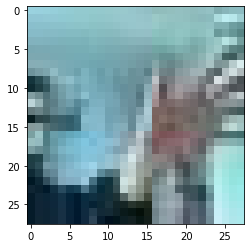

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.9352080e-01 3.6321915e-05 6.4428421e-03]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


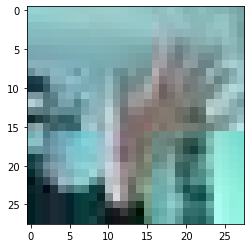

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.9926549e-01 2.5699174e-04 4.7753917e-04]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


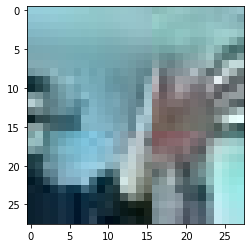

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.9926549e-01 2.5699174e-04 4.7753917e-04]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


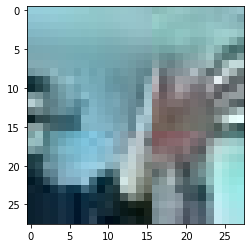

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.993375e-01 5.704013e-04 9.213336e-05]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


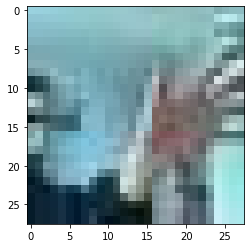

In [17]:
import random

wrong_predict_list = []

for i, _ in enumerate(predicted_labels):
    # iÎ≤àÏß∏ test_labelsÍ≥º y_testÏù¥ Îã§Î•∏ Í≤ΩÏö∞Îßå Î™®ÏïÑ Î¥ÖÏãúÎã§. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# Check if wrong_predict_list is not empty
if wrong_predict_list:
    # wrong_predict_listÏóêÏÑú ÎûúÎç§ÌïòÍ≤å 5Í∞úÎßå ÎΩëÏïÑÎ¥ÖÏãúÎã§.
    samples = random.choices(population=wrong_predict_list, k=min(5, len(wrong_predict_list)))

    for n in samples:
        print("ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: " + str(predicted_result[n]))
        print("ÎùºÎ≤®: " + str(y_test[n]) + ", ÏòàÏ∏°Í≤∞Í≥º: " + str(predicted_labels[n]))
        plt.imshow(x_test[n], cmap=plt.cm.binary)
        plt.show()
else:
    print("No wrong predictions found.")

# Îã§Î•∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 

In [18]:
image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test2/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test2/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test2/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/0305_rcp/test2"
(x_test, y_test)=load_data(image_dir_path, number_of_data=1133)
x_test_norm = x_test/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

392  images to be resized.
392  images resized.
365  images to be resized.
365  images resized.
376  images to be resized.
376  images resized.
ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞(x_test)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 1133 ÏûÖÎãàÎã§.
x_test shape: (1133, 28, 28, 3)
y_test shape: (1133,)


In [19]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

36/36 - 0s - loss: 1.1814 - accuracy: 0.7290
test_loss: 1.1814221143722534 
test_accuracy: 0.7290379405021667


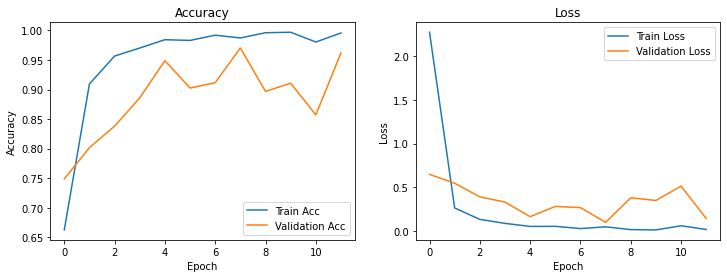

In [20]:
# ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [3.5021887e-05 3.4589741e-11 9.9996495e-01]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 2


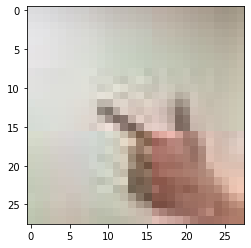

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [1.2247077e-10 1.1219129e-13 1.0000000e+00]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 2


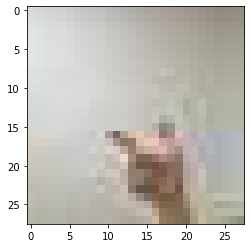

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [5.6664024e-11 6.5177204e-12 1.0000000e+00]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 2


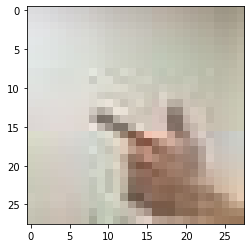

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [8.493595e-12 1.000000e+00 5.481567e-08]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 1


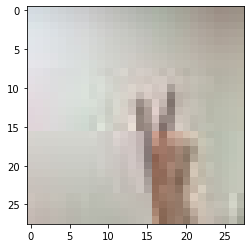

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [2.9504555e-21 1.0000000e+00 2.5043757e-11]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 1


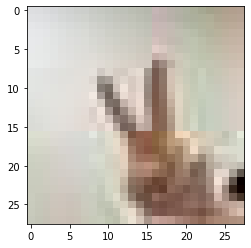

In [21]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # iÎ≤àÏß∏ test_labelsÍ≥º y_testÏù¥ Îã§Î•∏ Í≤ΩÏö∞Îßå Î™®ÏïÑ Î¥ÖÏãúÎã§. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list ÏóêÏÑú ÎûúÎç§ÌïòÍ≤å 5Í∞úÎßå ÎΩëÏïÑÎ¥ÖÏãúÎã§.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: " + str(predicted_result[n]))
    print("ÎùºÎ≤®: " + str(y_test[n]) + ", ÏòàÏ∏°Í≤∞Í≥º: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# üí° ÌöåÍ≥†

### Í≥ºÏ†ï
- Ïù¥ Ïßë Ï†Ä ÏßëÏóêÏÑú Ï∞çÏùÄ(?) ÏÇ¨ÏßÑÎì§ÏùÑ Îã§ ÎÅåÏñ¥Î™®ÏïÑÏÑú 6000Í∞úÍ∞Ä ÎÑòÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÌõàÎ†®ÏùÑ ÏãúÏº∞Í≥†, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏïàÏóê ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Í∞Ä Í≤πÏπòÎäî Í≤ΩÏö∞ ÎãπÏó∞ÌïòÍ≤å Ï†ïÌôïÎèÑÎäî ÎÜíÍ≤å ÎÇòÏò®Îã§. Î∞òÎ©¥, ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Í∞Ä 300Í∞úÎßå ÏûàÏóàÏùÑ ÎïåÎÇò, ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏôÄÎäî Í≤πÏπòÏßÄ ÏïäÎäî Îî¥ÌåêÏùò test Îç∞Ïù¥ÌÑ∞Î°ú Îã§Ïãú ÌôïÏù∏ÏùÑ Ìï¥Î≥¥Îãà ÏÑ±Îä•Ïù¥ 50% Ï†ïÎèÑÎ°ú ÎÇòÏò®Îã§. Ïù¥ ÏàòÏπòÎèÑ, epochÏàòÎ•º 5~10ÏúºÎ°ú Ï°∞Ï†à Î∞è Dense layerÏùÑ ÌïòÎÇò Ï∂îÍ∞Ä, Í∞Å layerÏóê ÏÇ¨Ïö©ÎêòÎäî Îâ¥Îü∞Ïùò Ïà´Ïûê (Conv2DÏóêÏÑúÎäî Ïù¥ÎØ∏ÏßÄ ÌäπÏßïÏùò Ïàò, DenseÏóêÏÑúÎäî Î∂ÑÎ•òÍ∏∞Ïóê ÏÇ¨Ïö©ÎêòÎäî Îâ¥Îü∞Ïùò Ïà´Ïûê) Î•º Ï°∞Ï†àÌï† Í≤ΩÏö∞ Ï†ÅÍ≤åÎäî 35%ÎåÄÏóêÏÑú 50%ÎåÄÍπåÏßÄ ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎêú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. 
- Ï≤òÏùåÏóê test Îç∞Ïù¥ÌÑ∞ÏóêÎã§Í∞Ä labeling ÌïòÎäî Í≤ÉÏùÑ ÍπúÎπ°Ìï¥ÏÑú ÏÑ±Îä•Ïù¥ Ï†ÄÏ°∞ÌïòÍ≤å ÎÇòÏôîÎã§. ÎãπÏó∞Ìûà Ïù∏Îç±Ïä§Í∞Ä Î∂ôÏñ¥ÏûàÏñ¥Ïïº ÏòàÏ∏°ÏùÑ ÌïòÎì† ÎßêÎì† Ìï†ÌÖêÎç∞ Ïã§ÏàòÏòÄÎã§.

### ÎäêÎÇÄ Ï†ê
- Í∑∏Îü∞Îç∞ Ïù¥Í±∞ ÏÉÅÎãπÌûà Ïû¨ÎØ∏ÏûàÎã§. ÏùºÎã® Ïù¥ÎØ∏ÏßÄÍ∞Ä Îì§Ïñ¥Í∞ÄÎã§Î≥¥Îãà, ÏΩîÎìúÎßå ÏßúÎã§Í∞Ä Ïù¥ÎØ∏ÏßÄÎ•º ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóê ÎêòÍ≤å Îß§Î†•ÏùÑ ÎäêÍºàÍ≥†, Ïã§ÏßàÏ†ÅÏúºÎ°ú ÏûêÏú®Ï£ºÌñâ ÏûêÎèôÏ∞®ÎÇò Í∏∞ÌÉÄ Ïó¨Îü¨Í∞ÄÏßÄ Î∂ÑÏïÑÏóê ÌôúÎ∞úÌïòÍ≤å Ïì∞Ïù¥Í≥† ÏûàÎäî Í∏∞Ïà†Ïù¥ÎùºÏÑú Ïû¨ÎØ∏ÏûàÏóàÎã§. Ïó≠Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßà Ïàò Î∞ñÏóê ÏóÜÍ≥†, Í≥ºÏ†ÅÌï©ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌååÎùºÎØ∏ÌÑ∞ ÏÑ∏Î∞ÄÌïòÍ≤å Ï°∞Ï†ïÌïòÎäî Í±∏ Ïûò Î¥êÏïºÍ≤†Îã§.
- Îî•Îü¨Îãù Îçî Ïó¥Ïã¨Ìûà Î∞∞ÏõåÏïºÍ≤†Îã§.